In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train=pd.read_csv("train.txt", delimiter=';', header=None, names=['sentence', 'label'])
df_test=pd.read_csv("test.txt", delimiter=';', header=None, names=['sentence', 'label'])
df_val=pd.read_csv("val.txt", delimiter=';', header=None, names=['sentence', 'label'])

In [ ]:
df=pd.concat([df_train, df_test, df_val])

**Inspection of dataset**

In [ ]:
df.shape

(20000, 2)

In [ ]:
df['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
df.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.isnull().sum()

sentence    0
label       0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

Text(0, 0.5, 'Count')

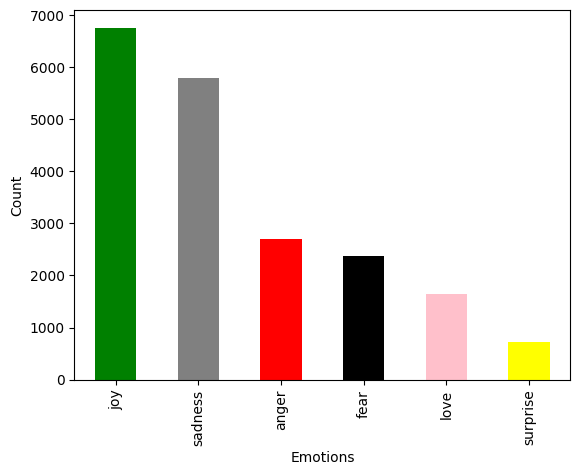

In [ ]:
df['label'].value_counts().plot(kind='bar', color=['green', 'grey', 'red', 'black', 'pink', 'yellow'])
plt.xlabel('Emotions')
plt.ylabel('Count')

**Pre-processing dataset**

In [ ]:
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words("english"))


In [ ]:
def preprocess_sentence(sentence):

    words = word_tokenize(sentence)


    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stopwords]



    processed_sentence = ' '.join(words)

    return processed_sentence


df['sentence'] = df['sentence'].apply(preprocess_sentence)

**Visualization of dataset**

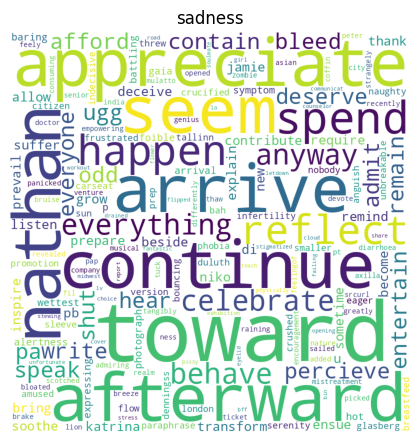

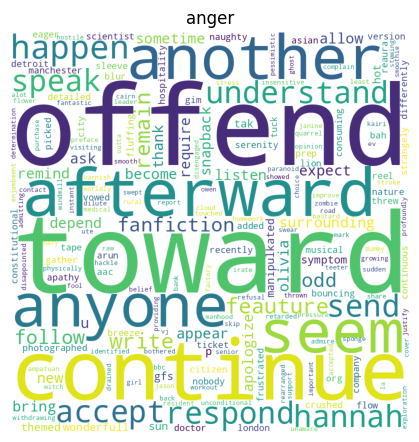

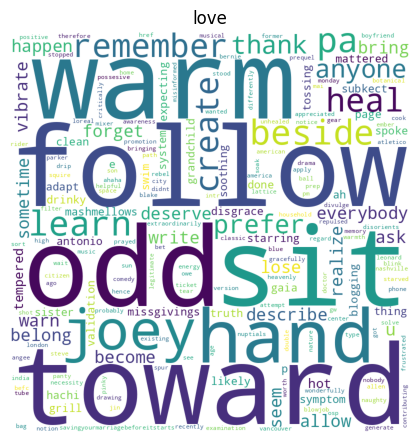

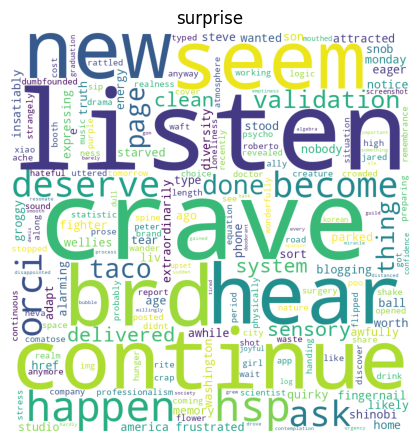

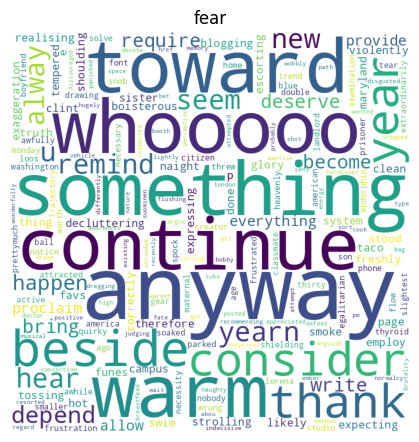

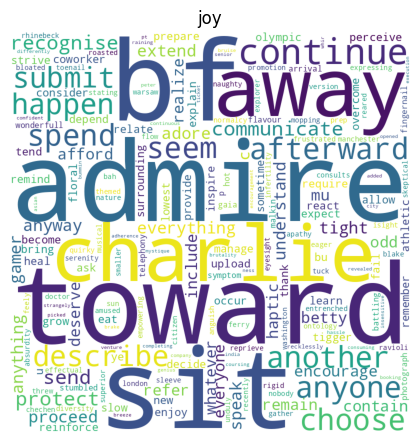

In [ ]:
labels = df['label'].unique()
for label in labels:
    text = " ".join(df[df['label'] == label]['sentence'])
    text = ' '.join(list(set(text.split())))
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(text)
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(label)
    plt.show()

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
#BoW and SVM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sentence=df['sentence']
label=df['label']

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentence)

In [ ]:
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df)

       aa  aaaaaaand  aaaaand  aaaah  aaaand  aac  aahhh  aaron  ab  abandon  \
0       0          0        0      0       0    0      0      0   0        0   
1       0          0        0      0       0    0      0      0   0        0   
2       0          0        0      0       0    0      0      0   0        0   
3       0          0        0      0       0    0      0      0   0        0   
4       0          0        0      0       0    0      0      0   0        0   
...    ..        ...      ...    ...     ...  ...    ...    ...  ..      ...   
19994   0          0        0      0       0    0      0      0   0        0   
19995   0          0        0      0       0    0      0      0   0        0   
19996   0          0        0      0       0    0      0      0   0        0   
19997   0          0        0      0       0    0      0      0   0        0   
19998   0          0        0      0       0    0      0      0   0        0   

       ...  zoned  zonisamide  zoo  zoo

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

accuracy = classifier.score(X_test, y_test)
print(f"Accuracy = {accuracy}")


Accuracy = 0.8295


In [ ]:
y_pred = classifier.predict(X_test)
y_true = y_test
accuracy = classifier.score(X_test, y_test)


In [ ]:

report = classification_report(y_true, y_pred, target_names=labels)

print(report)

              precision    recall  f1-score   support

     sadness       0.92      0.73      0.82       536
       anger       0.81      0.71      0.76       456
        love       0.75      0.95      0.84      1337
    surprise       0.88      0.58      0.70       325
        fear       0.90      0.90      0.90      1193
         joy       0.94      0.47      0.63       153

    accuracy                           0.83      4000
   macro avg       0.87      0.72      0.77      4000
weighted avg       0.84      0.83      0.82      4000



In [ ]:
#tf-idf and SVM

In [ ]:
sentence=df['sentence']
label=df['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)


X = tfidf_vectorizer.fit_transform(sentence)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC


classifier = SVC()
classifier.fit(X_train, y_train)


accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8665


In [ ]:
y_pred = classifier.predict(X_test)
y_true = y_test
report = classification_report(y_true, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

     sadness       0.90      0.81      0.86       536
       anger       0.83      0.78      0.80       456
        love       0.84      0.95      0.89      1337
    surprise       0.86      0.67      0.75       325
        fear       0.90      0.92      0.91      1193
         joy       0.85      0.56      0.68       153

    accuracy                           0.87      4000
   macro avg       0.86      0.78      0.82      4000
weighted avg       0.87      0.87      0.86      4000



In [ ]:
#N-gram and SVM

In [ ]:
sentence=df['sentence']
label=df['label']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=5000) #tri-gram


X = ngram_vectorizer.fit_transform(sentence)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)


In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train)

accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.85525


In [ ]:
y_pred = classifier.predict(X_test)
y_true = y_test
report = classification_report(y_true, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

     sadness       0.92      0.76      0.83       536
       anger       0.84      0.74      0.79       456
        love       0.80      0.97      0.88      1337
    surprise       0.89      0.61      0.72       325
        fear       0.89      0.94      0.91      1193
         joy       0.94      0.48      0.64       153

    accuracy                           0.86      4000
   macro avg       0.88      0.75      0.79      4000
weighted avg       0.86      0.86      0.85      4000



In [ ]:
#word2Vec and SVM

In [ ]:
sentence=df['sentence']
label=df['label']

In [ ]:
from gensim.models import Word2Vec

tokenized_sentences = [sentence.split() for sentence in sentence]

w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

w2v_model.train(tokenized_sentences, total_examples=len(tokenized_sentences), epochs=10)


(1580469, 1866300)

In [ ]:
import numpy as np

def get_sentence_vector(sentence):
    word_vectors = [w2v_model.wv[word] for word in sentence if word in w2v_model.wv]
    return np.mean(word_vectors, axis=0)

sentence_vectors = [get_sentence_vector(sentence.split()) for sentence in sentence]
X = np.vstack(sentence_vectors)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train)

accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.44425


In [ ]:
y_pred = classifier.predict(X_test)
y_true = y_test
report = classification_report(y_true, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00       536
       anger       0.00      0.00      0.00       456
        love       0.47      0.81      0.59      1337
    surprise       0.00      0.00      0.00       325
        fear       0.41      0.58      0.48      1193
         joy       0.00      0.00      0.00       153

    accuracy                           0.44      4000
   macro avg       0.15      0.23      0.18      4000
weighted avg       0.28      0.44      0.34      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Transformer, BERT

In [ ]:
import torch

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader, random_split

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])

In [ ]:


encoded_data = tokenizer(df['sentence'].tolist(), padding=True, truncation=True, return_tensors='pt')

input_ids = encoded_data['input_ids']
attention_masks = encoded_data['attention_mask']
labels = torch.tensor(df['encoded_label'].tolist())

dataset = TensorDataset(input_ids, attention_masks, labels)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)


optimizer = AdamW(model.parameters(), lr=2e-5)


model.to(device)
model.train()

for epoch in range(3):
    total_loss = 0

    for batch in train_dataloader:
        optimizer.zero_grad()

        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {total_loss/len(train_dataloader)}')

model.eval()

with torch.no_grad():
    correct = 0
    total = 0

    for batch in val_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predicted = torch.max(outputs.logits, dim=1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Validation Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 0.4484386360514909
Epoch 2, Loss: 0.13705397092737256
Epoch 3, Loss: 0.10870611295686103
Validation Accuracy: 0.93275
